Congratulations! You have enough money in this fund.


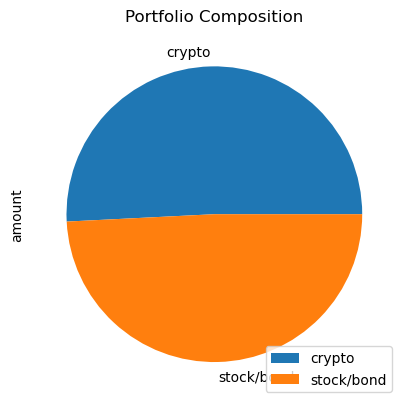

In [7]:
# Import necessary libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from alpaca_trade_api import REST
from datetime import datetime, timedelta
import pytz

# Load environment variables from .env file
load_dotenv(dotenv_path='APCA.env')  # Ensure this matches the location of your .env file

# Define monthly income
monthly_income = 12000

# ---- Evaluate Cryptocurrency Wallet ----
# Define cryptocurrency amounts
btc_amount = 1.2
eth_amount = 5.3

# Fetch current cryptocurrency prices using CoinGecko API
btc_url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
eth_url = 'https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd'

btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

btc_price = btc_response['bitcoin']['usd']
eth_price = eth_response['ethereum']['usd']

# Calculate total cryptocurrency wallet value
btc_value = btc_price * btc_amount
eth_value = eth_price * eth_amount
total_crypto_value = btc_value + eth_value

# ---- Evaluate Stock and Bond Holdings ----
# Set Alpaca API key and secret from .env file
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_endpoint = os.getenv('ALPACA_API_ENDPOINT')

# Initialize Alpaca REST API
api = REST(alpaca_api_key, alpaca_secret_key, base_url=alpaca_api_endpoint, api_version='v2')

# Define stock and bond amounts
spy_shares = 110
agg_shares = 200

# Use the datetime module to get the previous business day
today = datetime.now(pytz.timezone('America/New_York'))
start_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')  # Adjust as necessary for holidays/weekends
end_date = start_date  # Same as start_date for the most-recent trading day

# Fetch closing prices for SPY (stocks) and AGG (bonds) using Alpaca API
tickers = ["SPY", "AGG"]
timeframe = '1D'
portfolio_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Calculate total value of stock and bond portfolio
spy_close_price = portfolio_df[portfolio_df['symbol']=='SPY']['close'].iloc[0]
agg_close_price = portfolio_df[portfolio_df['symbol']=='AGG']['close'].iloc[0]
spy_value = spy_close_price * spy_shares
agg_value = agg_close_price * agg_shares
total_stock_bond_value = spy_value + agg_value

# ---- Evaluate the Emergency Fund ----
# Create a DataFrame for the savings data
savings_data = {'amount': [total_crypto_value, total_stock_bond_value]}
savings_df = pd.DataFrame(savings_data, index=['crypto', 'stock/bond'])

# Plot a pie chart of the savings
savings_df.plot.pie(y='amount', title='Portfolio Composition')

# Determine if there is enough money in the fund for an emergency
emergency_fund_value = monthly_income * 3
total_portfolio_value = total_crypto_value + total_stock_bond_value

if total_portfolio_value > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio_value == emergency_fund_value:
    print("Congratulations on reaching this important financial goal.")
else:
    shortfall = emergency_fund_value - total_portfolio_value
    print(f"You are ${shortfall} away from reaching the goal.")


In [8]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
from alpaca_trade_api import REST
from dotenv import load_dotenv
# Import your Monte Carlo simulation library here

# Load environment variables
load_dotenv(dotenv_path='APCA.env')

# Alpaca API authentication
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_endpoint = os.getenv('ALPACA_API_ENDPOINT')

api = REST(alpaca_api_key, alpaca_secret_key, base_url=alpaca_api_endpoint)

# Define the investment portfolio
tickers = ["SPY", "AGG"]
weights = [0.6, 0.4]  # 60/40 stocks to bonds ratio
timeframe = "1D"

# Configure the timeframe of historical data
start_date = pd.Timestamp(datetime.now() - pd.DateOffset(years=3), tz='America/New_York').isoformat()
end_date = pd.Timestamp(datetime.now(), tz='America/New_York').isoformat()

# Fetch historical data for SPY and AGG
portfolio_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Assuming the fetched data needs to be restructured similar to examples given, focus on closing prices
portfolio_close_prices = portfolio_df[['close']].pivot_table(index=portfolio_df.index, columns=portfolio_df['symbol'], values='close')

# Display sample data
print(portfolio_close_prices.head())

# Save the DataFrame to a CSV file
portfolio_close_prices.to_csv('portfolio_close_prices.csv', index=False)

print("Portfolio close prices have been saved to 'portfolio_close_prices.csv'")

symbol                        AGG     SPY
timestamp                                
2021-02-22 05:00:00+00:00  115.48  387.08
2021-02-23 05:00:00+00:00  115.51  387.52
2021-02-24 05:00:00+00:00  115.47  391.84
2021-02-25 05:00:00+00:00  114.41  382.37
2021-02-26 05:00:00+00:00  115.34  380.01
Portfolio close prices have been saved to 'portfolio_close_prices.csv'


In [9]:
# Define the weights for the portfolio: 40% bonds (AGG), 60% stocks (SPY) for the 30 years simulation
# Adjust these weights to 20% bonds and 80% stocks for the 10 years simulation later
weights = [0.4, 0.6]

# Define the number of simulations and trading days
num_simulations = 500
num_trading_days = 252 * 30  # 30 years

# Placeholder for a Monte Carlo simulation function
# This is where you would call your Monte Carlo simulation library or function
# For demonstration, this will be a simple placeholder function
def run_monte_carlo(prices_df, weights, n_simulations, n_days):
    # This function should return a DataFrame of simulated portfolio prices
    # For demonstration, return an empty DataFrame
    return pd.DataFrame()

# Run the Monte Carlo Simulation for 30 years
mc_30_years = run_monte_carlo(portfolio_close_prices, weights, num_simulations, num_trading_days)

# Placeholder for plotting simulation outcomes
def plot_simulation(mc_simulation):
    pass  # Implement plotting based on your library's requirements

# Placeholder for plotting distribution
def plot_distribution(mc_simulation):
    pass  # Implement distribution plotting based on your library's requirements

# Plot the simulation outcomes
plot_simulation(mc_30_years)

# Plot probability distribution and confidence intervals
plot_distribution(mc_30_years)

# Placeholder for fetching summary statistics from the Monte Carlo simulation results
def summary_statistics(mc_simulation):
    # Return summary statistics, for demonstration return a placeholder dictionary
    return {"95% CI Lower": 0.75, "95% CI Upper": 1.25}

# Fetch summary statistics
summary_stats = summary_statistics(mc_30_years)
print(summary_stats)

# Assuming you can extract the lower and upper bounds from the summary statistics
ci_lower_thirty_year = summary_stats["95% CI Lower"]
ci_upper_thirty_year = summary_stats["95% CI Upper"]

# Calculate the expected portfolio return at the 95% CI based on a $20,000 initial investment
initial_investment = 20000
ci_lower_value = ci_lower_thirty_year * initial_investment
ci_upper_value = ci_upper_thirty_year * initial_investment

# Print the results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_value} and ${ci_upper_value}")

{'95% CI Lower': 0.75, '95% CI Upper': 1.25}
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15000.0 and $25000.0


In [10]:
# Adjust the weights for the portfolio: 20% bonds (AGG), 80% stocks (SPY) for the 10 years simulation
weights_10_years = [0.2, 0.8]

# Adjust the number of trading days for a 10-year horizon
num_trading_days_10_years = 252 * 10  # 10 years

# Assuming we have a function 'run_monte_carlo' from before, we run the simulation with the new parameters
mc_10_years = run_monte_carlo(portfolio_close_prices, weights_10_years, num_simulations, num_trading_days_10_years)

# Use the same plotting functions as before to visualize the outcomes and the distribution
plot_simulation(mc_10_years)
plot_distribution(mc_10_years)

# Fetch and print summary statistics for the 10-year simulation
summary_stats_10_years = summary_statistics(mc_10_years)
print(summary_stats_10_years)

# Assuming you can extract the lower and upper bounds from the summary statistics
ci_lower_ten_year = summary_stats_10_years["95% CI Lower"]
ci_upper_ten_year = summary_stats_10_years["95% CI Upper"]

# Calculate the expected portfolio return at the 95% CI based on a $20,000 initial investment for the 10-year horizon
ci_lower_value_10_years = ci_lower_ten_year * initial_investment
ci_upper_value_10_years = ci_upper_ten_year * initial_investment

# Print the results for the 10-year horizon
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_value_10_years} and ${ci_upper_value_10_years}")


{'95% CI Lower': 0.75, '95% CI Upper': 1.25}
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $15000.0 and $25000.0


symbol                          AGG       SPY
timestamp                                    
2021-02-23 05:00:00+00:00  0.000260  0.001137
2021-02-24 05:00:00+00:00 -0.000346  0.011148
2021-02-25 05:00:00+00:00 -0.009180 -0.024168
2021-02-26 05:00:00+00:00  0.008129 -0.006172
2021-03-01 05:00:00+00:00 -0.002168  0.024789
            0             1             2             3             4    \
0  20004.610227  20143.635022  20172.217021  19984.388837  19881.752104   
1  20018.259442  20083.354592  20107.377517  19971.685451  19870.501535   
2  20008.143837  20003.762517  19957.862575  20013.800851  19830.676991   
3  19997.112200  19926.346126  19944.479393  20033.669375  19777.883539   
4  20026.270118  19864.755619  20023.321558  19944.141972  19789.632125   

            5             6             7             8             9    ...  \
0  19880.810446  20124.343432  20130.833920  19998.130815  20046.631469  ...   
1  19924.674788  20032.532451  19975.208995  20017.597354  20107.43

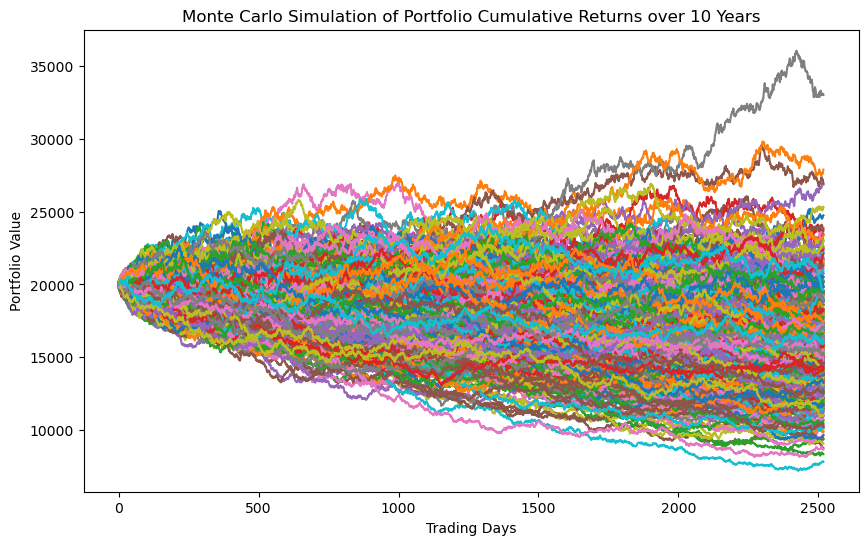

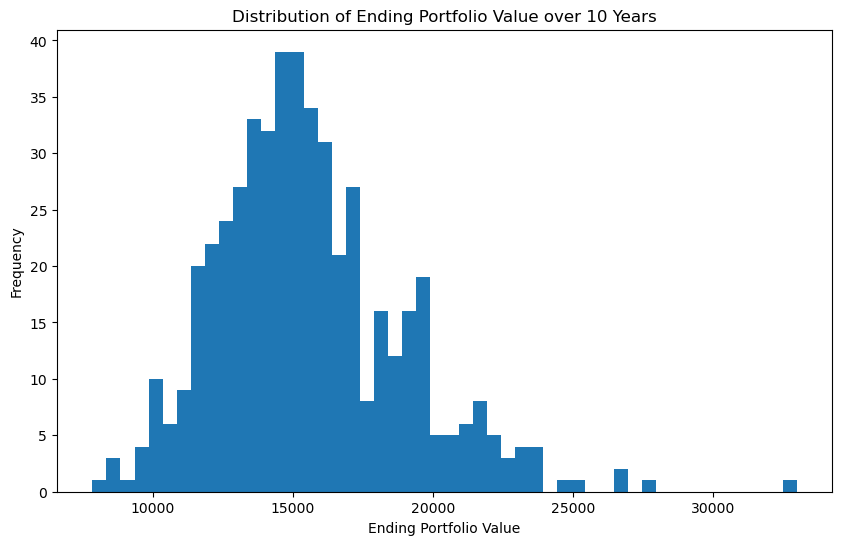

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $10,176.43 and $22,998.48


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
daily_returns = portfolio_close_prices.pct_change().dropna()

# Display sample data
print(daily_returns.head())

# Simulation parameters
num_simulations = 500
num_trading_days = 252 * 10  # 10 years
initial_investment = 20000

# Portfolio allocation (80% SPY, 20% AGG)
weights = np.array([0.8, 0.2])

# Calculate the mean and standard deviation of daily returns
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

# Pre-allocate space for the simulation DataFrame with zeros
simulation_data = np.zeros((num_trading_days, num_simulations))

for i in range(num_simulations):
    # Generate simulated daily returns using a normal distribution
    simulated_daily_returns = np.random.normal(mean_daily_returns, std_daily_returns, (num_trading_days, len(weights)))
    
    # Adjust simulated daily returns by the portfolio weights
    simulated_daily_returns_weighted = simulated_daily_returns.dot(weights)
    
    # Calculate the cumulative returns
    simulated_cumulative_returns = (1 + simulated_daily_returns_weighted).cumprod()
    
    # Store the simulated cumulative returns
    simulation_data[:, i] = initial_investment * simulated_cumulative_returns

# Convert the simulation data to a DataFrame
simulation_df = pd.DataFrame(simulation_data)

# Display the first few rows of the simulation DataFrame
print(simulation_df.head())

plt.figure(figsize=(10,6))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of Portfolio Cumulative Returns over 10 Years')
plt.xlabel('Trading Days')
plt.ylabel('Portfolio Value')
plt.show()

# Fetch ending cumulative returns across all simulations
ending_cumulative_returns = simulation_df.iloc[-1, :]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(ending_cumulative_returns, bins=50)
plt.title('Distribution of Ending Portfolio Value over 10 Years')
plt.xlabel('Ending Portfolio Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the 95% confidence interval
ci_lower = ending_cumulative_returns.quantile(0.025)
ci_upper = ending_cumulative_returns.quantile(0.975)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")
